<a href="https://colab.research.google.com/github/2403A54L01/AI-DS/blob/main/KMeans_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
x,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

In [3]:
x.shape

(300, 2)

In [4]:
y_true.shape

(300,)

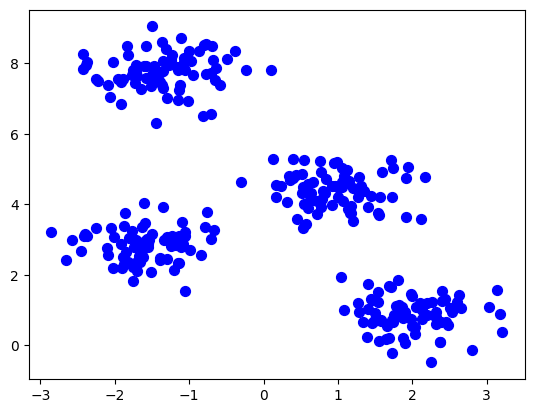

In [5]:
plt.scatter(x[:,0], x[:,1], s=50, color='blue')

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=4)

In [21]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [22]:
y_kmeans = k_means.predict(x)

In [23]:
centers = k_means.cluster_centers_
centers

array([[-1.57480456,  2.84532424],
       [-1.35241261,  7.76731726],
       [ 1.99469693,  0.8727049 ],
       [ 0.95415778,  4.39985544]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans, y_true)

0.0

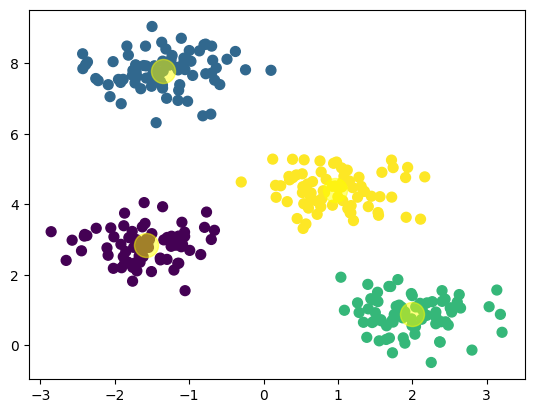

In [32]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], color='yellow', s=300,alpha=0.5)

In [33]:
from sklearn.metrics import pairwise_distances_argmin

In [34]:
def find_clusters(x, n_clusters, rseed=2):
  rng = np.random.RandomState(rseed)
  i = rng.permutation(x.shape[0])[:n_clusters]
  centers = x[i]
  while True:
    labels = pairwise_distances_argmin(x, centers)
    new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels

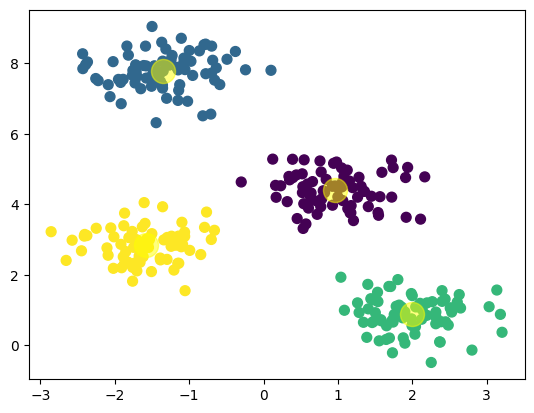

In [35]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

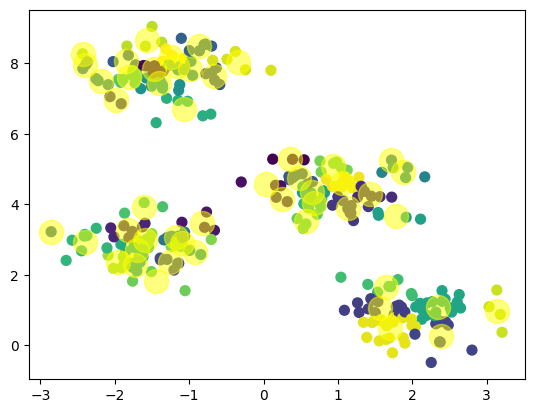

In [37]:
centers, labels = find_clusters(x, 50)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

In [38]:
from sklearn.datasets import make_moons
x,y =make_moons(n_samples=200, noise=.03, random_state=0)

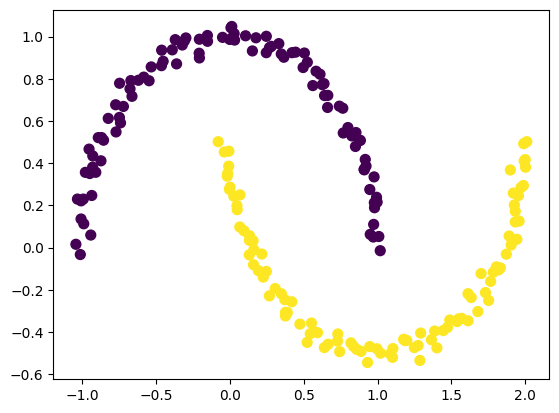

In [39]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='viridis');

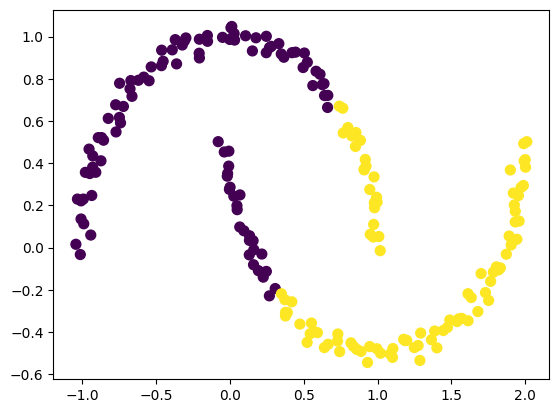

In [40]:
labels = KMeans(2, random_state=0).fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

In [43]:
from sklearn.cluster import SpectralClustering

In [44]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

In [45]:
labels = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


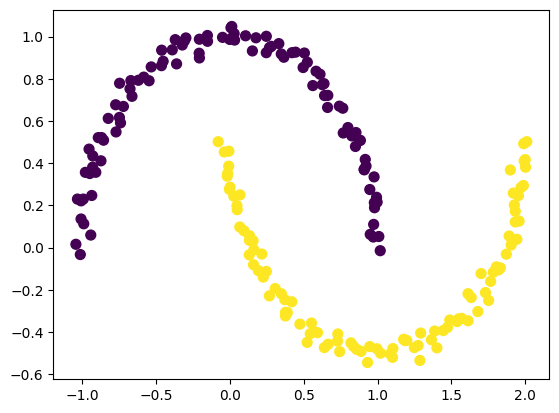

In [46]:
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis');

In [48]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
x=x[:,::-1]

In [49]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [50]:
def plot_kmeans(kmeans, x, n_clusters=4, rseed=0, ax=None):
  labels = kmeans.fit_predict(x)
  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis',edgecolors='k',zorder=2)
  centers = kmeans.cluster_centers_
  radii = [cdist(x[labels == i], [center]).max() for i, center in enumerate(centers)]
  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

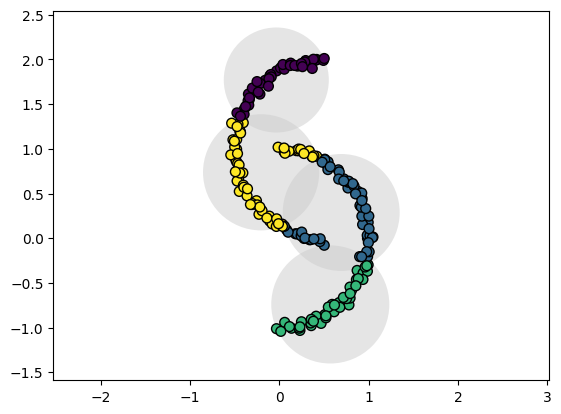

In [51]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, x)